# Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [20]:
data_filename = 'data/stats/metrics_no_fpred.csv'
df = pd.read_csv(data_filename)

# Do analysis

In [21]:
df.describe()

,total_positions,total_matches,num_suggestions,divergence,avg
count,173.0,173.000000,173.000000,173.000000,173.000000
mean,100.0,20.317919,20.317919,1212.734104,1212.734104
std,0.0,17.458841,17.458841,1284.837959,1284.837959
min,100.0,4.000000,4.000000,0.000000,0.000000
25%,100.0,4.000000,4.000000,1.000000,1.000000
50%,100.0,4.000000,4.000000,193.000000,193.000000
75%,100.0,36.000000,36.000000,2148.000000,2148.000000
max,100.0,100.000000,100.000000,4314.000000,4314.000000


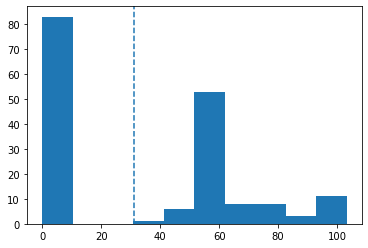

In [22]:
df['avg_divergence'] = df['divergence'] / df['total_matches']
plt.hist(df['avg_divergence'], bins=10)
plt.axvline(df.loc[(df['text'] == "f(A,B,C):-legal_move(B,C,A)")]['avg_divergence'].values, linestyle='dashed')

In [26]:
df.loc[(df['text'] == "f(A,B,C):-legal_move(B,C,A)")]['avg_divergence'].values

array([31.12])

(array([88.,  0.,  0.,  0., 51., 10.,  8.,  8.,  7.,  1.]),
 array([   0. ,  431.4,  862.8, 1294.2, 1725.6, 2157. , 2588.4, 3019.8,
        3451.2, 3882.6, 4314. ]),
 <BarContainer object of 10 artists>)

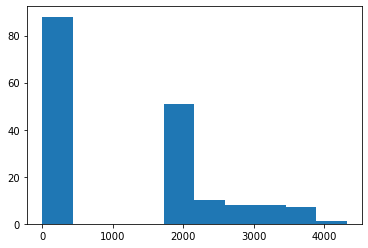

In [23]:
plt.hist(df['avg'], bins=10)

(array([88.,  0.,  0., 82.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([0.04 , 0.136, 0.232, 0.328, 0.424, 0.52 , 0.616, 0.712, 0.808,
        0.904, 1.   ]),
 <BarContainer object of 10 artists>)

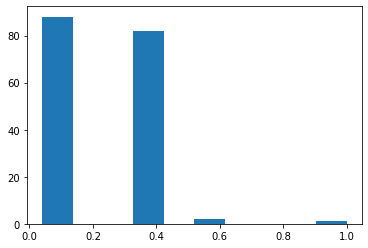

In [24]:
df['coverage'] = df['total_matches'] / df['total_positions']
plt.hist(df['coverage'], bins=10)

In [27]:
df.sort_values(by = ['avg_divergence', 'total_matches'], ascending = [True, False])

,text,total_positions,total_matches,num_suggestions,divergence,avg,avg_divergence,coverage
20,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",100,4,4,0.0,0.0,0.000000,0.04
27,"f(A,B,C):-legal_move(B,C,A),attacks(B,D,A),beh...",100,4,4,1.0,1.0,0.250000,0.04
28,"f(A,B,C):-legal_move(B,C,A),behind(B,C,E,A),be...",100,4,4,1.0,1.0,0.250000,0.04
30,"f(A,B,C):-legal_move(B,C,A),attacks(B,C,A),beh...",100,4,4,1.0,1.0,0.250000,0.04
35,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",100,4,4,1.0,1.0,0.250000,0.04
...,...,...,...,...,...,...,...,...
14,"f(A,B,C):-legal_move(B,C,A),attacks(B,C,A),beh...",100,36,36,3570.0,3570.0,99.166667,0.36
8,"f(A,B,C):-legal_move(B,C,A),attacks(B,D,A),beh...",100,36,36,3573.0,3573.0,99.250000,0.36
13,"f(A,B,C):-legal_move(B,C,A),attacks(B,C,A),beh...",100,36,36,3589.0,3589.0,99.694444,0.36
12,"f(A,B,C):-legal_move(B,C,A),attacks(B,D,A),beh...",100,36,36,3604.0,3604.0,100.111111,0.36


# Calculate Dataset Metrics

In [6]:
from collections import Counter

total_games = 0
valid_elo = 0
total_pos = 0
total_elo = 0
game_count = Counter()

In [7]:
import chess.pgn

with open('data/lichess_db_standard_rated_2013-01.pgn') as pgn:
    while game := chess.pgn.read_game(pgn):
        total_games += 1
        white_elo = game.headers['WhiteElo']
        black_elo = game.headers['BlackElo']
        if '?' not in white_elo and '?' not in black_elo:
            total_elo += int(white_elo)
            total_elo += int(black_elo)
            valid_elo += 1
        game_count[game.headers['Event']] += 1

In [8]:
print('Total games', total_games)
avg_elo = total_elo / (2 * valid_elo)
print('Average ELO', avg_elo)

Total games 121332
Average ELO 1600.8983024258137


In [11]:
variance = 0

with open('data/lichess_db_standard_rated_2013-01.pgn') as pgn:
    while game := chess.pgn.read_game(pgn):
        total_games += 1
        white_elo = game.headers['WhiteElo']
        black_elo = game.headers['BlackElo']
        if '?' not in white_elo and '?' not in black_elo:
            variance += (int(white_elo) - avg_elo) ** 2
            variance += (int(black_elo) - avg_elo) ** 2
        game_count[game.headers['Event']] += 1

In [13]:
import math

print('SD', math.sqrt(variance / valid_elo))

SD 288.77726911089053
